# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Fixing random state for reproducibility
np.random.seed(2360873)
N = 100

In [49]:
dados = pd.read_csv('previsao_de_renda.csv')
dados.shape #Conhecendo o df

(15000, 16)

In [50]:
dados.info() #Conhecendo os dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [51]:
dados = dados.dropna() #Retirando NAs

In [60]:
#Selecionando e adaptando dados de interesse
dados_numericos = dados.select_dtypes(include=['int64','float64'])
dados_numericos = dados_numericos.drop(['Unnamed: 0','index'], axis=1)
dados_numericos.dtypes

qtd_filhos                 int64
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

In [72]:
# Matriz de dispersão
dados.corr()

,Unnamed: 0,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
Unnamed: 0,1.000000,-0.001966,0.001677,0.009501,0.014926,0.000748,-0.002146,0.013749,0.017216,0.004088
index,-0.001966,1.000000,-0.017210,-0.093786,0.036835,-0.022515,-0.034574,0.040464,0.132285,-0.008561
posse_de_veiculo,0.001677,-0.017210,1.000000,0.003308,0.077668,-0.090136,-0.087514,0.122773,-0.013536,0.040626
posse_de_imovel,0.009501,-0.093786,0.003308,1.000000,0.024429,0.081715,0.000112,0.015852,-0.016710,0.040138
qtd_filhos,0.014926,0.036835,0.077668,0.024429,1.000000,-0.289012,-0.074250,0.908703,0.009931,-0.016189
idade,0.000748,-0.022515,-0.090136,0.081715,-0.289012,1.000000,0.323934,-0.257281,-0.016428,0.151364
tempo_emprego,-0.002146,-0.034574,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.013749,0.040464,0.122773,0.015852,0.908703,-0.257281,-0.065748,1.000000,0.003058,-0.004865
mau,0.017216,0.132285,-0.013536,-0.016710,0.009931,-0.016428,-0.047722,0.003058,1.000000,-0.014952
renda,0.004088,-0.008561,0.040626,0.040138,-0.016189,0.151364,0.394235,-0.004865,-0.014952,1.000000


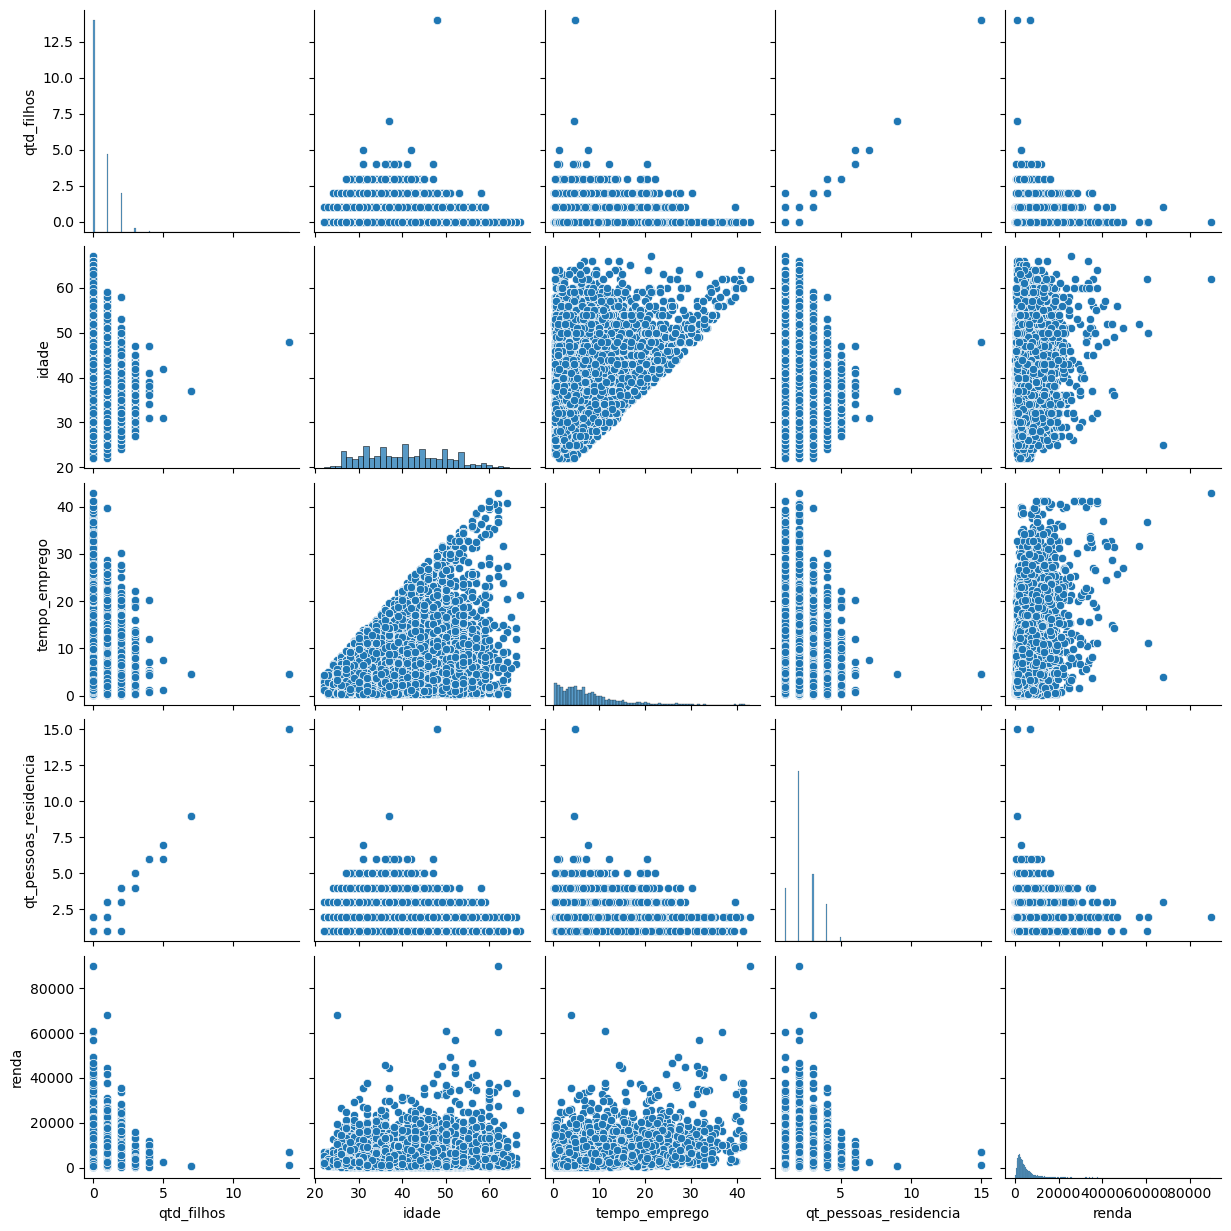

In [76]:
sns.pairplot(dados_numericos)

Percepções:
- A matriz de dispersão não oferece grande ajuda na identificação de padrões para a base de dados analisada, exceto pela correlação entre 'qtd_filhos' e 'qt_pessoas_residencia'

<AxesSubplot:xlabel='qtd_filhos', ylabel='qt_pessoas_residencia'>

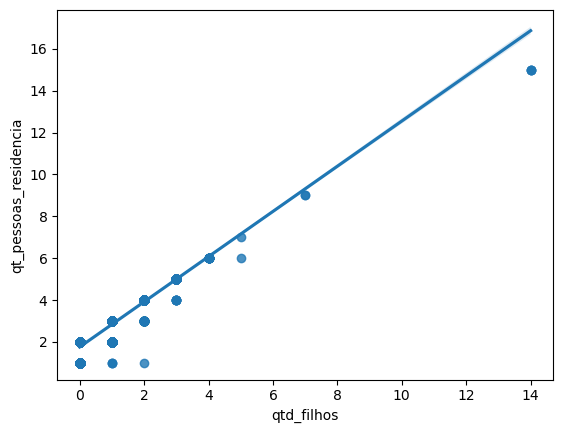

In [66]:
# Matriz de correlação
sns.regplot(x='qtd_filhos', y='qt_pessoas_residencia', data = dados_numericos)

Percepções:
- Usando as variáveis discretas no eixo X, percebe-se que apenas 'qtd_filhos' pode oferecer alguma visualização eficaz devido à amplitude inferior ao comparar com 'idade'
- Os resultados expostos com a variável independente sendo 'qtd_filhos, a única váriavel que demonstra algum grau de correlação é 'qt_pessoas_residencia'

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<AxesSubplot:xlabel='qtd_filhos', ylabel='renda'>

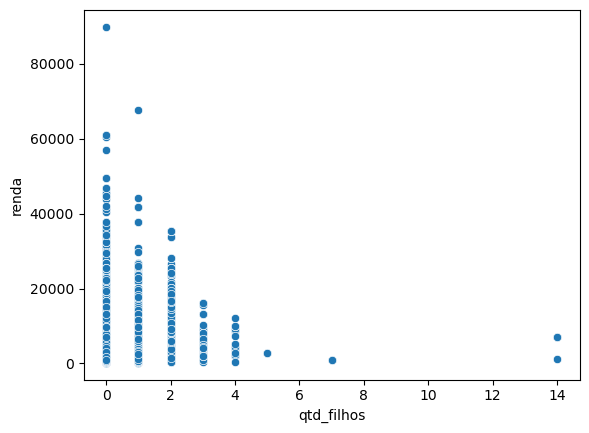

In [82]:
# Variáveis mais correlacionadas à renda: 'qtd_filhos' e 'qt_pessoas_residencia'
sns.scatterplot(data=dados_numericos, x='qtd_filhos', y='renda')

<AxesSubplot:xlabel='qt_pessoas_residencia', ylabel='renda'>

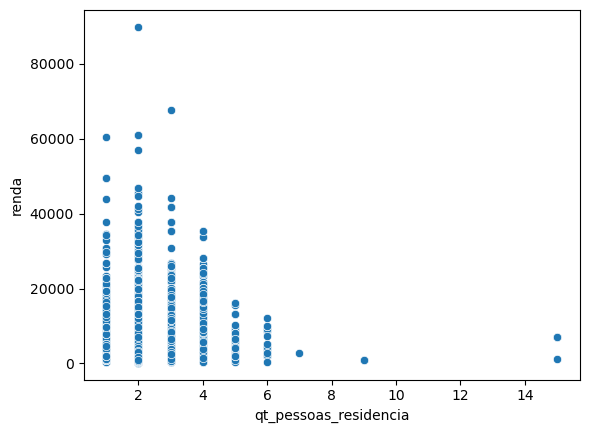

In [83]:
sns.scatterplot(data=dados_numericos, x='qt_pessoas_residencia', y='renda')

Pela correlação de ambas variáveis com 'renda', percebe-se a tendência de haver menos renda conforme aumenta-se a quantidade de filhos e/ou a quantidade de pessoas na residência

3) Na su aopinião, há outliers na variável renda?

Existem alguns pontos que são potencialmente discrepantes sim.

<AxesSubplot:xlabel='qtd_filhos', ylabel='renda'>

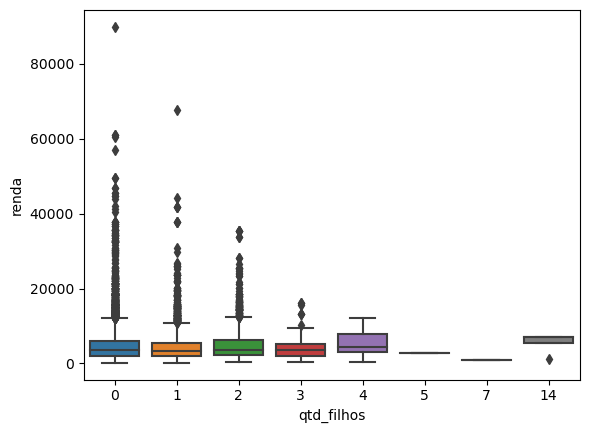

In [84]:
sns.boxplot(data=dados_numericos, x='qtd_filhos', y='renda')

<AxesSubplot:xlabel='qt_pessoas_residencia', ylabel='renda'>

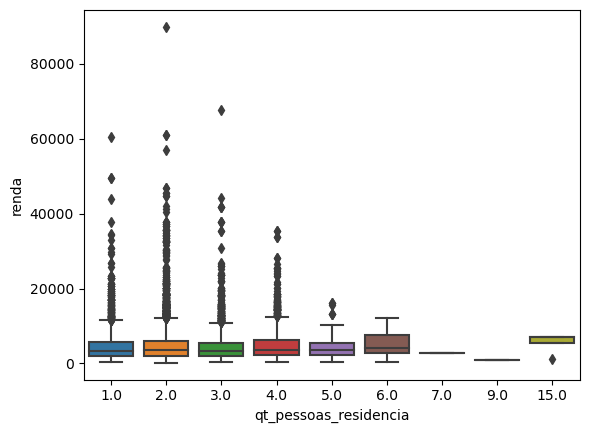

In [85]:
sns.boxplot(data=dados_numericos, x='qt_pessoas_residencia', y='renda')

Com a ajuda dos boxplots é possível comprovar que há potencialmente valores discrepantes na variável renda.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [109]:
df1 = dados[['renda','qtd_filhos']].copy()
df1['log_renda'] = np.log(df1['renda'])

<AxesSubplot:xlabel='qtd_filhos', ylabel='log_renda'>

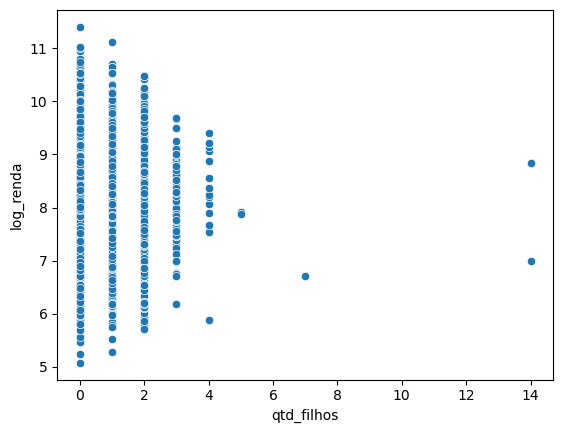

In [112]:
sns.scatterplot(data=df1, x='qtd_filhos', y='log_renda')

<AxesSubplot:xlabel='qtd_filhos', ylabel='log_renda'>

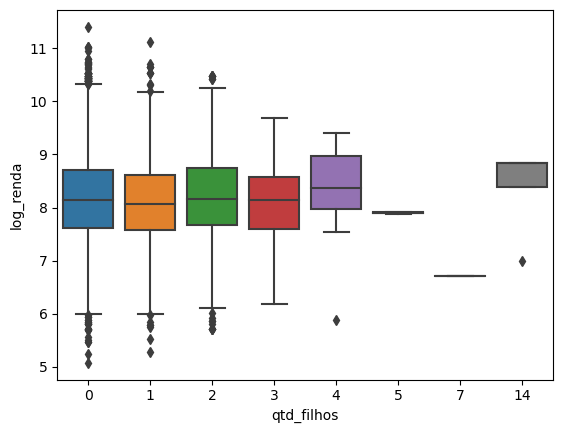

In [113]:
sns.boxplot(data=df1, x='qtd_filhos', y='log_renda')

In [114]:
df2 = dados[['renda','qt_pessoas_residencia']].copy()
df2['log_renda'] = np.log(df2['renda'])

<AxesSubplot:xlabel='qt_pessoas_residencia', ylabel='log_renda'>

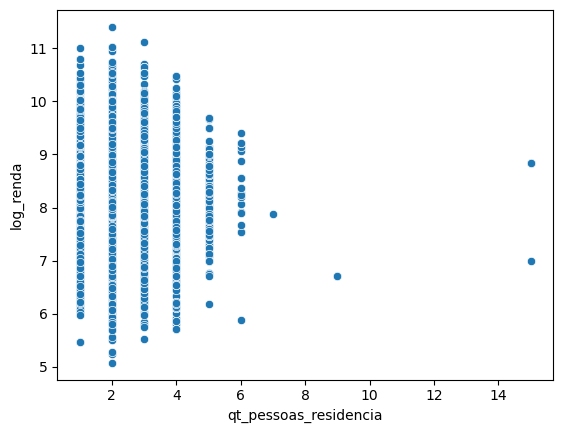

In [115]:
sns.scatterplot(data=df2, x='qt_pessoas_residencia', y='log_renda')

<AxesSubplot:xlabel='qt_pessoas_residencia', ylabel='log_renda'>

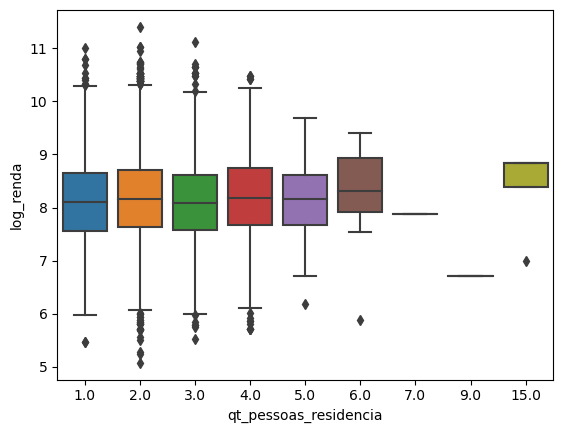

In [116]:
sns.boxplot(data=df2, x='qt_pessoas_residencia', y='log_renda')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Aplicar o log não fez tanta diferença, embora desconcentrou os valores da renda que estavam acima 4º quartil.